In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from truffletopia import Truffle, UnitOperation

Truffletopia makes truffles. A truffle product consists of: a base cake, truffle shell type, primary and secondary flavors, and a color group

In [11]:
truffle = Truffle()
truffle.set_attributes()
truffle.get_params()

base_cake: Cheese
truffle_type: Chocolate Outer
primary_flavor: Bavarian Cream
secondary_flavor: Vanilla
color_group: Taupe


Truffles are made by operational units in Truffletopia. The UnitOp or line performance is dictated by the type of truffle it makes.

In [12]:
line = UnitOperation()
line.set_attributes(truffle)
line.get_params()

name: CheChoBavVanTau
rate: 0.3832
std: 0.1485
distribution: <scipy.stats._continuous_distns.gamma_gen object at 0x7f6276908dc0>


We can randomly generate many products on different production lines.

In [13]:
results = pd.DataFrame()
for i in range(10):
    truffle = Truffle()
    line = UnitOperation()
    truffle.set_attributes()
    line.set_attributes(truffle)
    campaign = truffle.__dict__
    campaign['rate'] = line.run(10)
    results = pd.concat([results, pd.DataFrame(campaign)])
results = results.reset_index(drop=True)

We can inspect the results of the distributions

/home/wab665/anaconda3/envs/py37/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wab665/anaconda3/envs/py37/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


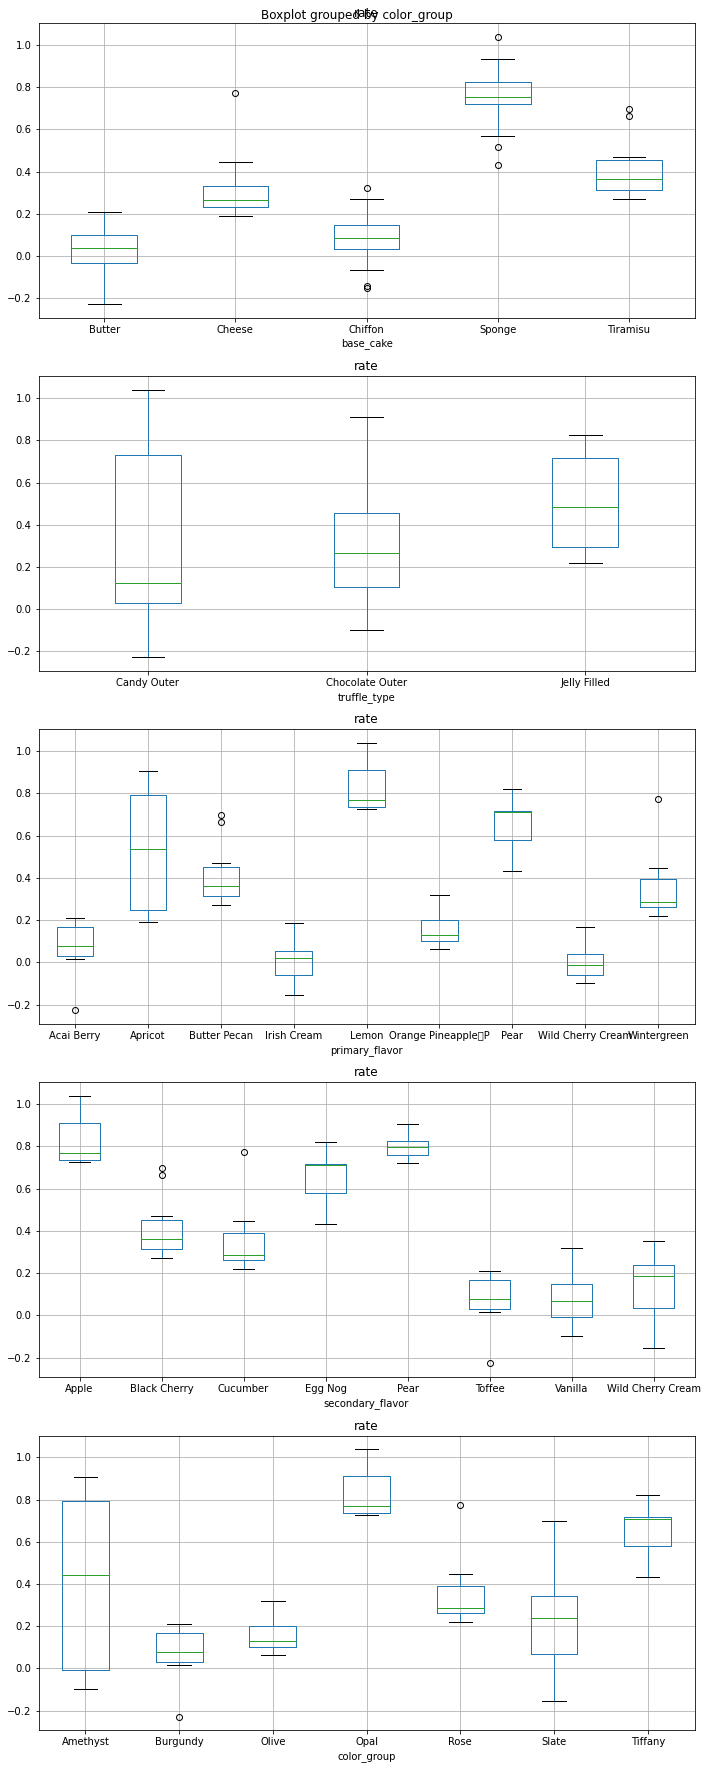

In [9]:
fig, ax = plt.subplots(5,1, figsize=(10,25))
for idx, name in enumerate(results.columns[:-1]):
    results.boxplot('rate', name, ax=ax[idx])
plt.tight_layout()